<a href="https://colab.research.google.com/github/jiin-son/nba/blob/main/NBA_Machine_Learning_(xgboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [3]:
!pip install xgboost
import xgboost as xgb

In [4]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.2 MB/s eta 0:00:00


In [5]:
from google.colab import files
uploaded = files.upload()

Saving prep_df.csv to prep_df.csv


In [6]:
df = pd.read_csv('prep_df.csv')

In [7]:
import random
import hashlib

def md5_hash(input_string):
  """Generates an MD5 hash from a given string.
  Args:
    input_string: The string to hash.
  Returns:
    The MD5 hash as a hexadecimal string.
  """
  md5_hasher = hashlib.md5()
  md5_hasher.update(input_string.encode('utf-8'))
  return md5_hasher.hexdigest()

# Example usage
input_string = "NBA"
hashed_value = md5_hash(input_string)
print(f"The MD5 hash of '{input_string}' is: {hashed_value}")

# Convert the hexadecimal hash to an integer
try:
    number = int(hashed_value, 16)
    print(f"The integer representation of the hash is: {number}")
except ValueError:
    print("Invalid hexadecimal string")

# Set the seed value
random.seed(number)

print(f"Initial seed number: {number}")

# Generate a list of 10 random numbers
random.seed(number)
a = 0
b = 2**31-1
random_numbers = [random.randint(a, b) for _ in range(10)]

# Print the list
print("Seed", random_numbers)

The MD5 hash of 'NBA' is: 52b6d6fc82db6aef110362f4755a1fe8
The integer representation of the hash is: 109946054124266886270703940407869972456
Initial seed number: 109946054124266886270703940407869972456
Seed [1578879816, 1978497697, 1190903919, 1878057853, 1288653849, 873208946, 343223680, 1954458820, 1609495891, 882467736]


In [8]:
df

,HOME,OVERTIME,REST_DAYS,FG_PCT,FT_PCT,REB,AST,STL,BLK,TO,PF,Height_in_Inches,YEARS_IN_LEAGUE,FG_PCT_LAST_SEASON,FT_PCT_LAST_SEASON,REB_LAST_SEASON,AST_LAST_SEASON,STL_LAST_SEASON,BLK_LAST_SEASON,TOV_LAST_SEASON,PF_LAST_SEASON,TRADED_LAST_SEASON,PLAYER_AGE,TRADED_THIS_SEASON,POS_G,POS_F,POS_C,POS_FC,POS_GF,POS_CF,POS_FG,TEAM_GSW,TEAM_OKC,TEAM_CHI,TEAM_MEM,TEAM_ORL,TEAM_SAS,TEAM_DAL,TEAM_TOR,TEAM_LAC,TEAM_PHI,TEAM_SAC,TEAM_BOS,TEAM_IND,TEAM_DET,TEAM_MIL,TEAM_CLE,TEAM_WAS,TEAM_CHA,TEAM_HOU,TEAM_DEN,TEAM_PHX,TEAM_MIA,TEAM_UTA,TEAM_LAL,TEAM_POR,TEAM_MIN,TEAM_NYK,TEAM_BKN,TEAM_ATL,TEAM_NOP,W
0,0.000,0.000,2.000,0.421,1.000,3.000,3.000,1.000,1.000,3.000,2.000,78,9.000,0.499,0.703,387.000,249.000,83.000,37.000,166.000,185.000,0.000,28.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,0.000,0.000,2.000,0.412,0.833,10.000,1.000,2.000,0.000,2.000,1.000,80,8.000,0.471,0.833,601.000,364.000,75.000,43.000,188.000,145.000,0.000,26.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
2,0.000,0.000,2.000,0.500,1.000,9.000,1.000,1.000,0.000,4.000,5.000,86,10.000,0.516,0.858,409.000,115.000,42.000,111.000,89.000,156.000,0.000,29.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
3,0.000,0.000,2.000,0.308,0.500,4.000,4.000,1.000,3.000,3.000,1.000,76,8.000,0.461,0.901,310.000,377.000,74.000,87.000,112.000,152.000,0.000,30.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
4,0.000,0.000,2.000,0.167,0.000,8.000,6.000,0.000,0.000,2.000,4.000,76,16.000,0.480,0.833,373.000,333.000,61.000,53.000,124.000,108.000,0.000,34.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,1.000,0.000,0.000,0.100,0.000,4.000,4.000,0.000,0.000,1.000,2.000,73,5.000,0.468,0.821,265.000,281.000,39.000,6.000,61.000,106.000,0.000,26.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9631,1.000,0.000,0.000,0.400,0.000,5.000,1.000,0.000,0.000,0.000,2.000,79,4.000,0.446,0.895,276.000,82.000,40.000,25.000,32.000,99.000,0.000,27.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9632,1.000,0.000,0.000,0.167,0.000,7.000,2.000,0.000,0.000,0.000,1.000,79,5.000,0.434,0.440,211.000,77.000,51.000,44.000,34.000,75.000,1.000,25.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9633,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,78,2.000,0.400,0.500,20.000,5.000,5.000,1.000,3.000,11.000,0.000,20.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000


In [9]:
seed1 = random_numbers[0]

In [10]:
sub_df = df.drop([
       'POS_G', 'POS_F', 'POS_C', 'POS_FC', 'POS_GF', 'POS_CF', 'POS_FG',
       'TEAM_GSW', 'TEAM_OKC', 'TEAM_CHI', 'TEAM_MEM',
       'TEAM_ORL', 'TEAM_SAS', 'TEAM_DAL', 'TEAM_TOR', 'TEAM_LAC', 'TEAM_PHI',
       'TEAM_SAC', 'TEAM_BOS', 'TEAM_IND', 'TEAM_DET', 'TEAM_MIL', 'TEAM_CLE',
       'TEAM_WAS', 'TEAM_CHA', 'TEAM_HOU', 'TEAM_DEN', 'TEAM_PHX', 'TEAM_MIA',
       'TEAM_UTA', 'TEAM_LAL', 'TEAM_POR', 'TEAM_MIN', 'TEAM_NYK', 'TEAM_BKN',
       'TEAM_ATL', 'TEAM_NOP'], axis = 1)
X = sub_df.drop(['W'], axis = 1)
y = sub_df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

In [11]:
# prompt: use xgboost native api as the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, and seed generation) ...
seed = random_numbers[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

# Define objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'n_estimators': trial.suggest_int("n_estimators", 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain)

    y_pred_prob = model.predict(dtest)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)


# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xg_model = xgb.train(best_params, dtrain)

y_pred_prob = xg_model.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


[I 2025-02-05 22:20:44,803] A new study created in memory with name: no-name-8cf49bd2-9a5c-4fb0-9884-4084f9c20534


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:45,985] Trial 0 finished with value: 0.5952257394914374 and parameters: {'learning_rate': 0.22917753943345948, 'max_depth': 3, 'subsample': 0.7581797051864765, 'colsample_bytree': 0.7989650674026697, 'n_estimators': 159, 'min_child_weight': 7, 'gamma': 2.942011540590638, 'reg_alpha': 6.121056246333623}. Best is trial 0 with value: 0.5952257394914374.
[I 2025-02-05 22:20:46,147] Trial 1 finished with value: 0.5812143227815257 and parameters: {'learning_rate': 0.13670233936479304, 'max_depth': 9, 'subsample': 0.5783284933155257, 'colsample_bytree': 0.5970598765948232, 'n_estimators': 134, 'min_child_weight': 1, 'gamma': 2.6541853903271595, 'reg_alpha': 9.161873531236376}. Best is trial 0 with value: 0.5952257394914374.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:46,485] Trial 2 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.14780554589026382, 'max_depth': 8, 'subsample': 0.7255737961044306, 'colsample_bytree': 0.880241054541727, 'n_estimators': 429, 'min_child_weight': 7, 'gamma': 2.22338383093971, 'reg_alpha': 9.482399366295395}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:46,559] Trial 3 finished with value: 0.5915931499740529 and parameters: {'learning_rate': 0.20761468486103776, 'max_depth': 3, 'subsample': 0.622985842349254, 'colsample_bytree': 0.9100305865347131, 'n_estimators': 266, 'min_child_weight': 9, 'gamma': 5.766726412173126, 'reg_alpha': 3.149677114295022}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:46,628] Trial 4 finished with value: 0.5806953814218994 and parameters: {'learning_rate': 0.08540848831859792, 'max_depth': 3, 'subsample': 0.5434922821425219, 'colsample_bytree': 0.8951428958806434, 'n_estimators': 97, 'min_child_weight': 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:46,825] Trial 5 finished with value: 0.5957446808510638 and parameters: {'learning_rate': 0.2071537838019801, 'max_depth': 10, 'subsample': 0.5605674548962458, 'colsample_bytree': 0.7463696483757805, 'n_estimators': 109, 'min_child_weight': 6, 'gamma': 1.558425864378039, 'reg_alpha': 0.35656562521594326}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:46,923] Trial 6 finished with value: 0.5718733783082511 and parameters: {'learning_rate': 0.014876644967084443, 'max_depth': 3, 'subsample': 0.7348698590743858, 'colsample_bytree': 0.600611418096479, 'n_estimators': 253, 'min_child_weight': 6, 'gamma': 3.653555706409979, 'reg_alpha': 2.0450444442311166}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:46,991] Trial 7 finished with value: 0.5853658536585366 and parameters: {'learning_rate': 0.049991421163601196, 'max_depth': 4, 'subsample': 0.5809783192708715, 'colsample_bytree': 0.6150807925885498, 'n_estimators': 53, 'min_child_w

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:47,086] Trial 8 finished with value: 0.5838090295796575 and parameters: {'learning_rate': 0.06428388740817914, 'max_depth': 9, 'subsample': 0.6945194607857701, 'colsample_bytree': 0.6122960377387657, 'n_estimators': 400, 'min_child_weight': 8, 'gamma': 6.886906046189216, 'reg_alpha': 1.4890350801821195}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:47,147] Trial 9 finished with value: 0.5853658536585366 and parameters: {'learning_rate': 0.14750612977884264, 'max_depth': 4, 'subsample': 0.5187006512913959, 'colsample_bytree': 0.9072293671441165, 'n_estimators': 236, 'min_child_weight': 1, 'gamma': 2.829131019272083, 'reg_alpha': 5.891932223650369}. Best is trial 2 with value: 0.598858329008822.
[I 2025-02-05 22:20:47,266] Trial 10 finished with value: 0.5895173845355475 and parameters: {'learning_rate': 0.29624847775414875, 'max_depth': 7, 'subsample': 0.8995844846530698, 'colsample_bytree': 0.9864549587044152, 'n_estimators': 484, 'min_child_we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:47,403] Trial 11 finished with value: 0.6310326933056565 and parameters: {'learning_rate': 0.20948122650551365, 'max_depth': 10, 'subsample': 0.8755872378961558, 'colsample_bytree': 0.7586681863478242, 'n_estimators': 369, 'min_child_weight': 10, 'gamma': 0.48892212419798353, 'reg_alpha': 3.9189362957266125}. Best is trial 11 with value: 0.6310326933056565.
[I 2025-02-05 22:20:47,560] Trial 12 finished with value: 0.6159833938764919 and parameters: {'learning_rate': 0.24498831313182473, 'max_depth': 7, 'subsample': 0.8811267976604089, 'colsample_bytree': 0.7476168102767997, 'n_estimators': 379, 'min_child_weight': 10, 'gamma': 0.16988519469650787, 'reg_alpha': 4.049566966520679}. Best is trial 11 with value: 0.6310326933056565.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:47,681] Trial 13 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.2694829067489771, 'max_depth': 6, 'subsample': 0.9337844537669986, 'colsample_bytree': 0.71481452600176, 'n_estimators': 357, 'min_child_weight': 10, 'gamma': 0.5141006085952666, 'reg_alpha': 4.068864736341489}. Best is trial 11 with value: 0.6310326933056565.
[I 2025-02-05 22:20:47,867] Trial 14 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.2420017946493321, 'max_depth': 6, 'subsample': 0.8419372228916864, 'colsample_bytree': 0.6932185238858857, 'n_estimators': 328, 'min_child_weight': 10, 'gamma': 0.01617022000085616, 'reg_alpha': 4.390012282403734}. Best is trial 11 with value: 0.6310326933056565.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:48,027] Trial 15 finished with value: 0.6123508043591074 and parameters: {'learning_rate': 0.18169044914700117, 'max_depth': 10, 'subsample': 0.9988733030854349, 'colsample_bytree': 0.5023298774473018, 'n_estimators': 327, 'min_child_weight': 9, 'gamma': 4.447524819726055, 'reg_alpha': 3.1108554231288474}. Best is trial 11 with value: 0.6310326933056565.
[I 2025-02-05 22:20:48,133] Trial 16 finished with value: 0.5905552672548002 and parameters: {'learning_rate': 0.27173572859640244, 'max_depth': 7, 'subsample': 0.8205581301587528, 'colsample_bytree': 0.8019303175241016, 'n_estimators': 493, 'min_child_weight': 4, 'gamma': 7.885200728128085, 'reg_alpha': 5.701817449587138}. Best is trial 11 with value: 0.6310326933056565.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:48,250] Trial 17 finished with value: 0.5910742086144266 and parameters: {'learning_rate': 0.11186171911198498, 'max_depth': 5, 'subsample': 0.8414011291090838, 'colsample_bytree': 0.8124257561486279, 'n_estimators': 402, 'min_child_weight': 9, 'gamma': 5.110898339330182, 'reg_alpha': 7.291314442182426}. Best is trial 11 with value: 0.6310326933056565.
[I 2025-02-05 22:20:48,378] Trial 18 finished with value: 0.6165023352361183 and parameters: {'learning_rate': 0.1817910249661569, 'max_depth': 8, 'subsample': 0.9274548312497346, 'colsample_bytree': 0.6764434263256917, 'n_estimators': 205, 'min_child_weight': 10, 'gamma': 1.1109039936941856, 'reg_alpha': 3.1471817947100824}. Best is trial 11 with value: 0.6310326933056565.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:20:48,507] Trial 19 finished with value: 0.6024909185262065 and parameters: {'learning_rate': 0.17398848959976718, 'max_depth': 9, 'subsample': 0.97372977326484, 'colsample_bytree': 0.6593017895065887, 'n_estimators': 169, 'min_child_weight': 8, 'gamma': 3.628730918567484, 'reg_alpha': 2.737226118277315}. Best is trial 11 with value: 0.6310326933056565.
Best trial: FrozenTrial(number=11, state=1, values=[0.6310326933056565], datetime_start=datetime.datetime(2025, 2, 5, 22, 20, 47, 277253), datetime_complete=datetime.datetime(2025, 2, 5, 22, 20, 47, 402834), params={'learning_rate': 0.20948122650551365, 'max_depth': 10, 'subsample': 0.8755872378961558, 'colsample_bytree': 0.7586681863478242, 'n_estimators': 369, 'min_child_weight': 10, 'gamma': 0.48892212419798353, 'reg_alpha': 3.9189362957266125}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribut

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
# prompt: use sklearn to selectmodel the base model is xgboost and use it as feature selection and then xgboost native api as machine learning model

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier  # Import XGBClassifier

# Use the trained GradientBoostingClassifier for feature selection
selector = SelectFromModel(XGBClassifier(**study.best_params), threshold="median")  # Instantiate XGBClassifier with best params
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the final XGBoost model with the selected features using native API
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
xg_model_final = xgb.train(best_params, dtrain)

y_pred_prob = xg_model_final.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy (with feature selection): {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score (with feature selection): {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Specificity (with feature selection): {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity (with feature selection): {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC (with feature selection): {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


Accuracy (with feature selection): 0.596
F1 Score (with feature selection): 0.596
Specificity (with feature selection): 0.594
Sensitivity (with feature selection): 0.610
ROC AUC (with feature selection): 0.596
[[559 403]
 [376 589]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
!pip install shap
import shap

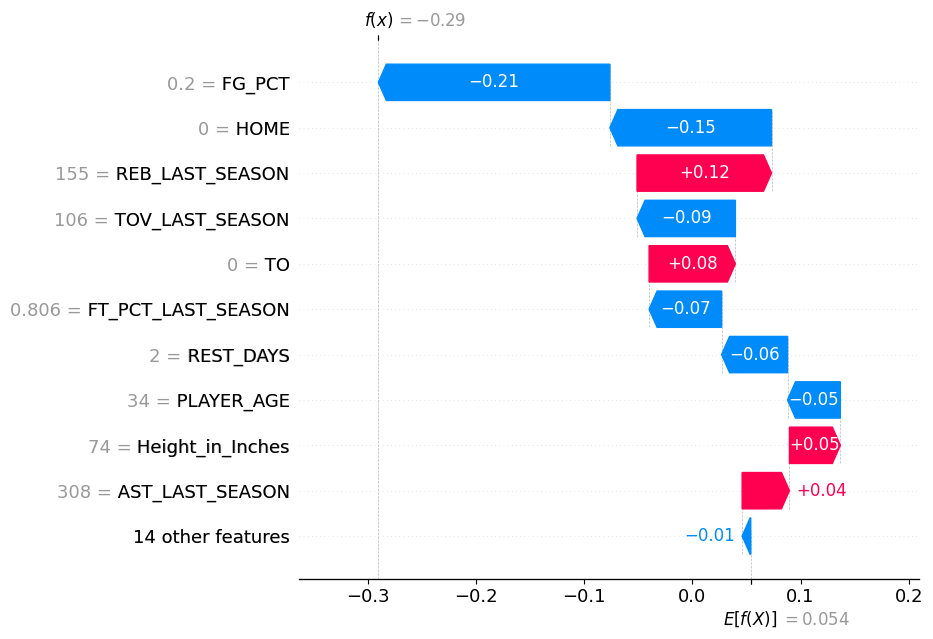

In [18]:
# (4) Train 3 seeds and pick up 1 representative seed result to explain feature to target relationships using shap.
explainer = shap.Explainer(xg_model, X_train)
shap_values = explainer(X_test, check_additivity = False)
# which of the variables are important to the target = bare_nuclei
shap.plots.waterfall(shap_values[0], max_display = 11)

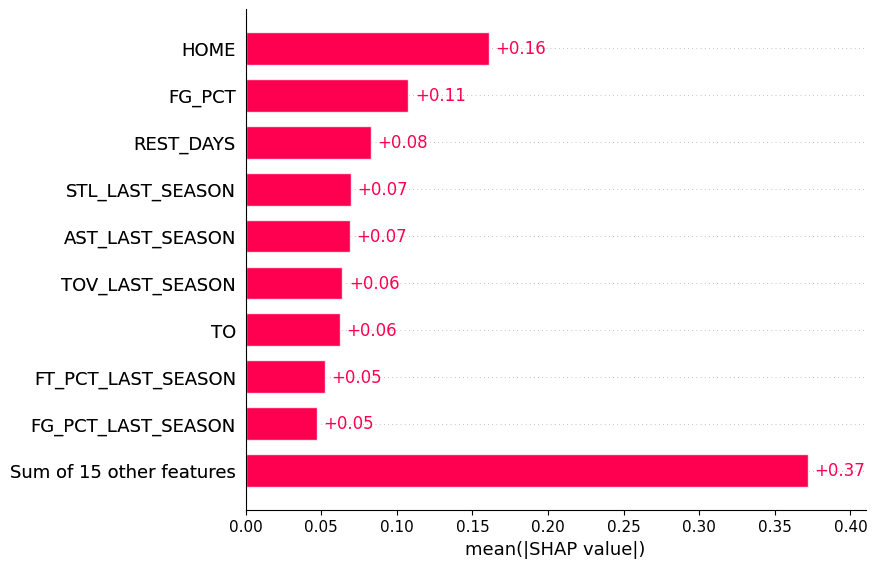

In [33]:
shap.plots.bar(shap_values)

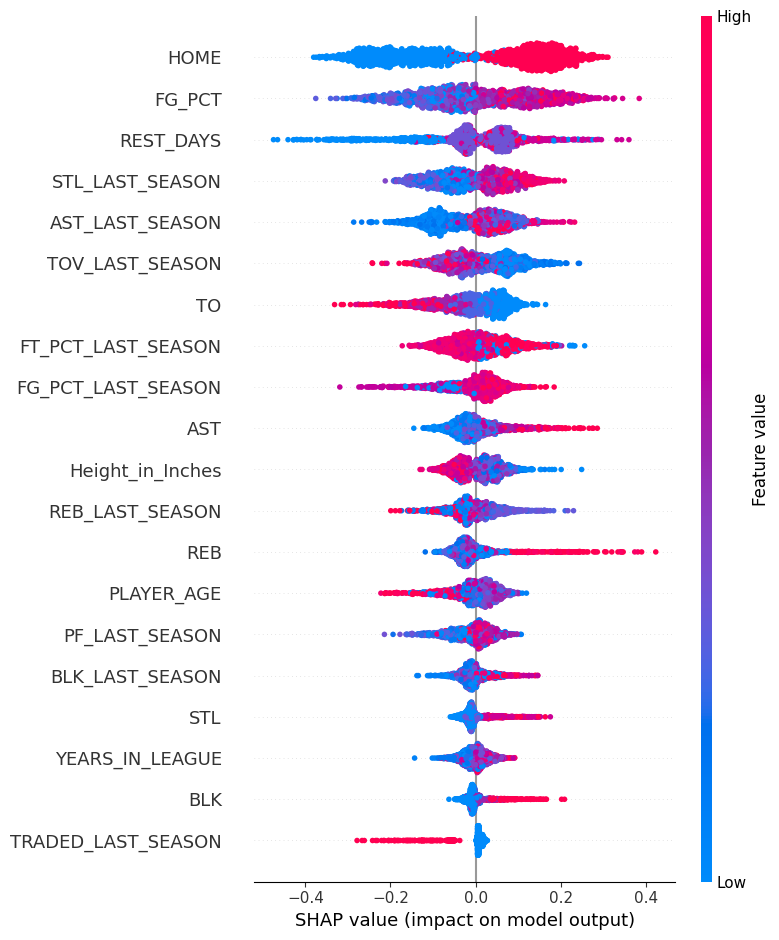

In [34]:
shap.summary_plot(shap_values)

In [21]:
# prompt: use xgboost native api as the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, and seed generation) ...
seed = random_numbers[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Define objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'n_estimators': trial.suggest_int("n_estimators", 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain)

    y_pred_prob = model.predict(dtest)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)


# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xg_model = xgb.train(best_params, dtrain)

y_pred_prob = xg_model.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


[I 2025-02-05 22:30:19,586] A new study created in memory with name: no-name-ea870066-9280-4661-89f1-7a763de081ed


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:19,777] Trial 0 finished with value: 0.5921120913336793 and parameters: {'learning_rate': 0.15160339898820047, 'max_depth': 4, 'subsample': 0.9927459111658232, 'colsample_bytree': 0.8436312339214167, 'n_estimators': 228, 'min_child_weight': 10, 'gamma': 0.7531162939328717, 'reg_alpha': 0.630411971420507}. Best is trial 0 with value: 0.5921120913336793.
[I 2025-02-05 22:30:19,976] Trial 1 finished with value: 0.574468085106383 and parameters: {'learning_rate': 0.01467649184137428, 'max_depth': 5, 'subsample': 0.753360769643252, 'colsample_bytree': 0.9640699184592442, 'n_estimators': 468, 'min_child_weight': 2, 'gamma': 9.404334748173776, 'reg_alpha': 6.892930562091076}. Best is trial 0 with value: 0.5921120913336793.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:20,164] Trial 2 finished with value: 0.5791385573430202 and parameters: {'learning_rate': 0.06860760243101005, 'max_depth': 4, 'subsample': 0.6891546124523269, 'colsample_bytree': 0.7240021509260923, 'n_estimators': 390, 'min_child_weight': 9, 'gamma': 9.163273019938257, 'reg_alpha': 7.423494350333344}. Best is trial 0 with value: 0.5921120913336793.
[I 2025-02-05 22:30:20,326] Trial 3 finished with value: 0.5781006746237675 and parameters: {'learning_rate': 0.012664541364092837, 'max_depth': 10, 'subsample': 0.5553732165697737, 'colsample_bytree': 0.7381874202908882, 'n_estimators': 107, 'min_child_weight': 1, 'gamma': 6.683421313697701, 'reg_alpha': 9.281235585030586}. Best is trial 0 with value: 0.5921120913336793.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:20,485] Trial 4 finished with value: 0.5864037363777893 and parameters: {'learning_rate': 0.25014370803403474, 'max_depth': 5, 'subsample': 0.8768356352732534, 'colsample_bytree': 0.9688506055495928, 'n_estimators': 373, 'min_child_weight': 6, 'gamma': 9.39196291144581, 'reg_alpha': 9.274108980281078}. Best is trial 0 with value: 0.5921120913336793.
[I 2025-02-05 22:30:20,610] Trial 5 finished with value: 0.580176440062273 and parameters: {'learning_rate': 0.27120790637291625, 'max_depth': 6, 'subsample': 0.8329775863952649, 'colsample_bytree': 0.7824640555381213, 'n_estimators': 50, 'min_child_weight': 5, 'gamma': 9.485175754460316, 'reg_alpha': 6.818116727066864}. Best is trial 0 with value: 0.5921120913336793.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:20,802] Trial 6 finished with value: 0.563051375194603 and parameters: {'learning_rate': 0.056908202415562076, 'max_depth': 5, 'subsample': 0.951457421288578, 'colsample_bytree': 0.5795651439194778, 'n_estimators': 479, 'min_child_weight': 6, 'gamma': 8.262183969721008, 'reg_alpha': 8.587143898011563}. Best is trial 0 with value: 0.5921120913336793.
[I 2025-02-05 22:30:20,993] Trial 7 finished with value: 0.5749870264660093 and parameters: {'learning_rate': 0.08133697451511389, 'max_depth': 5, 'subsample': 0.5974743844405601, 'colsample_bytree': 0.6488945088710332, 'n_estimators': 208, 'min_child_weight': 5, 'gamma': 8.512366449188013, 'reg_alpha': 5.944856479310888}. Best is trial 0 with value: 0.5921120913336793.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:21,155] Trial 8 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.1976559623577926, 'max_depth': 4, 'subsample': 0.5763729763511565, 'colsample_bytree': 0.6166068314427053, 'n_estimators': 398, 'min_child_weight': 7, 'gamma': 2.2384371242022505, 'reg_alpha': 2.904175857087571}. Best is trial 8 with value: 0.598858329008822.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:21,434] Trial 9 finished with value: 0.6170212765957447 and parameters: {'learning_rate': 0.23218890298769795, 'max_depth': 5, 'subsample': 0.7274623315092363, 'colsample_bytree': 0.6844941917375467, 'n_estimators': 194, 'min_child_weight': 4, 'gamma': 0.9750340916564015, 'reg_alpha': 6.203056263704564}. Best is trial 9 with value: 0.6170212765957447.
[I 2025-02-05 22:30:21,546] Trial 10 finished with value: 0.6092371562013492 and parameters: {'learning_rate': 0.19141669620410018, 'max_depth': 9, 'subsample': 0.7024181115179815, 'colsample_bytree': 0.533217456621353, 'n_estimators': 156, 'min_child_weight': 3, 'gamma': 3.823485376572313, 'reg_alpha': 4.001202445715148}. Best is trial 9 with value: 0.6170212765957447.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:21,663] Trial 11 finished with value: 0.5998962117280747 and parameters: {'learning_rate': 0.20197229205057748, 'max_depth': 9, 'subsample': 0.6951774670760613, 'colsample_bytree': 0.5165108239989518, 'n_estimators': 160, 'min_child_weight': 3, 'gamma': 3.1916456202188193, 'reg_alpha': 3.8779426728110833}. Best is trial 9 with value: 0.6170212765957447.
[I 2025-02-05 22:30:21,812] Trial 12 finished with value: 0.5993772703684483 and parameters: {'learning_rate': 0.1575210321938686, 'max_depth': 8, 'subsample': 0.758190751420906, 'colsample_bytree': 0.5136140042884717, 'n_estimators': 282, 'min_child_weight': 3, 'gamma': 4.493901032936094, 'reg_alpha': 4.2498811990666665}. Best is trial 9 with value: 0.6170212765957447.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:21,991] Trial 13 finished with value: 0.628956927867151 and parameters: {'learning_rate': 0.21824629774744503, 'max_depth': 7, 'subsample': 0.6522845957078133, 'colsample_bytree': 0.6688979118360371, 'n_estimators': 293, 'min_child_weight': 4, 'gamma': 0.08545341249381633, 'reg_alpha': 2.024848762440398}. Best is trial 13 with value: 0.628956927867151.
[I 2025-02-05 22:30:22,149] Trial 14 finished with value: 0.6180591593149974 and parameters: {'learning_rate': 0.24248536174403693, 'max_depth': 7, 'subsample': 0.6365414378267932, 'colsample_bytree': 0.6782092033421266, 'n_estimators': 298, 'min_child_weight': 4, 'gamma': 0.6757444497276139, 'reg_alpha': 1.7459975746604295}. Best is trial 13 with value: 0.628956927867151.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:22,268] Trial 15 finished with value: 0.6081992734820966 and parameters: {'learning_rate': 0.28834599591123433, 'max_depth': 7, 'subsample': 0.6211435956417727, 'colsample_bytree': 0.8543195570356794, 'n_estimators': 301, 'min_child_weight': 8, 'gamma': 1.9811118829432552, 'reg_alpha': 0.06542232156930838}. Best is trial 13 with value: 0.628956927867151.
[I 2025-02-05 22:30:22,395] Trial 16 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.23741607252099045, 'max_depth': 7, 'subsample': 0.5238034322160223, 'colsample_bytree': 0.6645103628250484, 'n_estimators': 333, 'min_child_weight': 4, 'gamma': 0.3222723300831404, 'reg_alpha': 1.9576334100826105}. Best is trial 13 with value: 0.628956927867151.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:22,527] Trial 17 finished with value: 0.6071613907628438 and parameters: {'learning_rate': 0.15121624448650528, 'max_depth': 8, 'subsample': 0.6393316768047006, 'colsample_bytree': 0.8134601809597587, 'n_estimators': 262, 'min_child_weight': 1, 'gamma': 5.840778590102648, 'reg_alpha': 1.917994297064489}. Best is trial 13 with value: 0.628956927867151.
[I 2025-02-05 22:30:22,656] Trial 18 finished with value: 0.6139076284379865 and parameters: {'learning_rate': 0.29824728956601343, 'max_depth': 8, 'subsample': 0.8046550333946361, 'colsample_bytree': 0.6000215120122566, 'n_estimators': 341, 'min_child_weight': 4, 'gamma': 1.9807632158103683, 'reg_alpha': 1.2054110201676194}. Best is trial 13 with value: 0.628956927867151.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:30:22,840] Trial 19 finished with value: 0.6087182148417228 and parameters: {'learning_rate': 0.12351693247268034, 'max_depth': 6, 'subsample': 0.6493379275979491, 'colsample_bytree': 0.9027118186585057, 'n_estimators': 437, 'min_child_weight': 7, 'gamma': 0.02292362753404792, 'reg_alpha': 2.985968411458376}. Best is trial 13 with value: 0.628956927867151.
Best trial: FrozenTrial(number=13, state=1, values=[0.628956927867151], datetime_start=datetime.datetime(2025, 2, 5, 22, 30, 21, 827330), datetime_complete=datetime.datetime(2025, 2, 5, 22, 30, 21, 991163), params={'learning_rate': 0.21824629774744503, 'max_depth': 7, 'subsample': 0.6522845957078133, 'colsample_bytree': 0.6688979118360371, 'n_estimators': 293, 'min_child_weight': 4, 'gamma': 0.08545341249381633, 'reg_alpha': 2.024848762440398}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistributi

In [22]:
# prompt: use sklearn to selectmodel the base model is xgboost and use it as feature selection and then xgboost native api as machine learning model

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier  # Import XGBClassifier

# Use the trained GradientBoostingClassifier for feature selection
selector = SelectFromModel(XGBClassifier(**study.best_params), threshold="median")  # Instantiate XGBClassifier with best params
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the final XGBoost model with the selected features using native API
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
xg_model_final = xgb.train(best_params, dtrain)

y_pred_prob = xg_model_final.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy (with feature selection): {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score (with feature selection): {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Specificity (with feature selection): {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity (with feature selection): {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC (with feature selection): {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


Accuracy (with feature selection): 0.597
F1 Score (with feature selection): 0.596
Specificity (with feature selection): 0.611
Sensitivity (with feature selection): 0.621
ROC AUC (with feature selection): 0.596
[[527 396]
 [381 623]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
explainer = shap.Explainer(xg_model, X_train)
shap_values2 = explainer(X_test, check_additivity = False)

In [24]:
# prompt: use xgboost native api as the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, and seed generation) ...
seed = random_numbers[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Define objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'n_estimators': trial.suggest_int("n_estimators", 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain)

    y_pred_prob = model.predict(dtest)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)


# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xg_model = xgb.train(best_params, dtrain)

y_pred_prob = xg_model.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


[I 2025-02-05 22:31:07,547] A new study created in memory with name: no-name-15b7d9f5-c0e3-4567-9e2d-17534d3026b6


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:07,686] Trial 0 finished with value: 0.6056045666839647 and parameters: {'learning_rate': 0.11561571386977826, 'max_depth': 8, 'subsample': 0.7207604364816527, 'colsample_bytree': 0.8103376076042839, 'n_estimators': 65, 'min_child_weight': 5, 'gamma': 5.809933802462185, 'reg_alpha': 0.9221806433465218}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:07,791] Trial 1 finished with value: 0.5998962117280747 and parameters: {'learning_rate': 0.22253203321229306, 'max_depth': 4, 'subsample': 0.9886826649371743, 'colsample_bytree': 0.6369388160278338, 'n_estimators': 87, 'min_child_weight': 8, 'gamma': 0.5989604641329338, 'reg_alpha': 8.893325118621913}. Best is trial 0 with value: 0.6056045666839647.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:07,925] Trial 2 finished with value: 0.5832900882200311 and parameters: {'learning_rate': 0.14278911328569763, 'max_depth': 7, 'subsample': 0.5005771152024998, 'colsample_bytree': 0.6034458890270624, 'n_estimators': 202, 'min_child_weight': 7, 'gamma': 4.32707558169715, 'reg_alpha': 2.283734900264829}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,033] Trial 3 finished with value: 0.5978204462895693 and parameters: {'learning_rate': 0.09823262417457314, 'max_depth': 6, 'subsample': 0.9673964813593643, 'colsample_bytree': 0.7406707368202317, 'n_estimators': 362, 'min_child_weight': 7, 'gamma': 2.0424724334861075, 'reg_alpha': 8.171999338111835}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,114] Trial 4 finished with value: 0.5910742086144266 and parameters: {'learning_rate': 0.16091123144524697, 'max_depth': 9, 'subsample': 0.5785557274386699, 'colsample_bytree': 0.5497193854172719, 'n_estimators': 314, 'min_child_we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:08,191] Trial 5 finished with value: 0.5781006746237675 and parameters: {'learning_rate': 0.012539279707979644, 'max_depth': 9, 'subsample': 0.6390482400490594, 'colsample_bytree': 0.5722568865761164, 'n_estimators': 197, 'min_child_weight': 1, 'gamma': 9.124729692333013, 'reg_alpha': 0.25238240015249547}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,283] Trial 6 finished with value: 0.5967825635703166 and parameters: {'learning_rate': 0.12336056279786374, 'max_depth': 7, 'subsample': 0.9813771147004691, 'colsample_bytree': 0.5439435993830848, 'n_estimators': 146, 'min_child_weight': 6, 'gamma': 0.5311401951214689, 'reg_alpha': 8.905484698927829}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,367] Trial 7 finished with value: 0.593149974052932 and parameters: {'learning_rate': 0.2686682537559754, 'max_depth': 7, 'subsample': 0.658648330456544, 'colsample_bytree': 0.6672860821505828, 'n_estimators': 452, 'min_child_w

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:08,450] Trial 8 finished with value: 0.5796574987026466 and parameters: {'learning_rate': 0.026422003296747813, 'max_depth': 3, 'subsample': 0.6512782896869904, 'colsample_bytree': 0.6273413473256739, 'n_estimators': 292, 'min_child_weight': 2, 'gamma': 7.443222067961929, 'reg_alpha': 0.649890089258458}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,532] Trial 9 finished with value: 0.5900363258951739 and parameters: {'learning_rate': 0.08544536440496882, 'max_depth': 6, 'subsample': 0.6031815334514696, 'colsample_bytree': 0.9719038400954554, 'n_estimators': 497, 'min_child_weight': 10, 'gamma': 3.3528414969059703, 'reg_alpha': 1.369637523325834}. Best is trial 0 with value: 0.6056045666839647.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:08,663] Trial 10 finished with value: 0.6050856253243383 and parameters: {'learning_rate': 0.19785177669345627, 'max_depth': 10, 'subsample': 0.8138340119990638, 'colsample_bytree': 0.8972463727227401, 'n_estimators': 75, 'min_child_weight': 3, 'gamma': 6.691372916240032, 'reg_alpha': 3.918493929026957}. Best is trial 0 with value: 0.6056045666839647.
[I 2025-02-05 22:31:08,828] Trial 11 finished with value: 0.6097560975609756 and parameters: {'learning_rate': 0.2086978812007098, 'max_depth': 10, 'subsample': 0.8250540534295236, 'colsample_bytree': 0.9028331100306073, 'n_estimators': 63, 'min_child_weight': 4, 'gamma': 6.294172769968801, 'reg_alpha': 3.8402767109108042}. Best is trial 11 with value: 0.6097560975609756.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:08,999] Trial 12 finished with value: 0.5926310326933056 and parameters: {'learning_rate': 0.25797648423116976, 'max_depth': 10, 'subsample': 0.8269719362771353, 'colsample_bytree': 0.8650390403596827, 'n_estimators': 60, 'min_child_weight': 4, 'gamma': 8.381774270224357, 'reg_alpha': 6.111229254375365}. Best is trial 11 with value: 0.6097560975609756.
[I 2025-02-05 22:31:09,128] Trial 13 finished with value: 0.5998962117280747 and parameters: {'learning_rate': 0.21123769570553083, 'max_depth': 9, 'subsample': 0.7547965242171719, 'colsample_bytree': 0.8124445575542516, 'n_estimators': 145, 'min_child_weight': 4, 'gamma': 5.181629052233519, 'reg_alpha': 3.8909937951343316}. Best is trial 11 with value: 0.6097560975609756.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:09,237] Trial 14 finished with value: 0.5915931499740529 and parameters: {'learning_rate': 0.171065246743794, 'max_depth': 8, 'subsample': 0.8852212474045329, 'colsample_bytree': 0.9889227542621571, 'n_estimators': 130, 'min_child_weight': 5, 'gamma': 9.948169837776284, 'reg_alpha': 5.689271058880255}. Best is trial 11 with value: 0.6097560975609756.
[I 2025-02-05 22:31:09,378] Trial 15 finished with value: 0.5957446808510638 and parameters: {'learning_rate': 0.06333718618374806, 'max_depth': 8, 'subsample': 0.7357879752495754, 'colsample_bytree': 0.7960219840548752, 'n_estimators': 229, 'min_child_weight': 5, 'gamma': 4.282137695324254, 'reg_alpha': 2.865656932874586}. Best is trial 11 with value: 0.6097560975609756.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:09,495] Trial 16 finished with value: 0.5936689154125584 and parameters: {'learning_rate': 0.2997798977579257, 'max_depth': 5, 'subsample': 0.7364727103223193, 'colsample_bytree': 0.9044378861840618, 'n_estimators': 51, 'min_child_weight': 3, 'gamma': 6.971051259467718, 'reg_alpha': 6.715011193451781}. Best is trial 11 with value: 0.6097560975609756.
[I 2025-02-05 22:31:09,615] Trial 17 finished with value: 0.5973015049299429 and parameters: {'learning_rate': 0.1836320295427662, 'max_depth': 10, 'subsample': 0.8752422903819852, 'colsample_bytree': 0.7160478958846641, 'n_estimators': 126, 'min_child_weight': 4, 'gamma': 5.968199703365538, 'reg_alpha': 4.148849641313517}. Best is trial 11 with value: 0.6097560975609756.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:09,784] Trial 18 finished with value: 0.6019719771665801 and parameters: {'learning_rate': 0.11491338380703264, 'max_depth': 8, 'subsample': 0.788069978597289, 'colsample_bytree': 0.8220526389233821, 'n_estimators': 381, 'min_child_weight': 6, 'gamma': 7.939666464034518, 'reg_alpha': 2.3607093443101883}. Best is trial 11 with value: 0.6097560975609756.
[I 2025-02-05 22:31:09,943] Trial 19 finished with value: 0.5910742086144266 and parameters: {'learning_rate': 0.060642893792503205, 'max_depth': 9, 'subsample': 0.889008922764897, 'colsample_bytree': 0.935972535821548, 'n_estimators': 257, 'min_child_weight': 3, 'gamma': 3.866885531874694, 'reg_alpha': 7.154726792230743}. Best is trial 11 with value: 0.6097560975609756.
Best trial: FrozenTrial(number=11, state=1, values=[0.6097560975609756], datetime_start=datetime.datetime(2025, 2, 5, 22, 31, 8, 668726), datetime_complete=datetime.datetime(2025, 2, 5, 22, 31, 8, 828367), params={'learning_rate': 0.2086978812007098, 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
# prompt: use sklearn to selectmodel the base model is xgboost and use it as feature selection and then xgboost native api as machine learning model

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier  # Import XGBClassifier

# Use the trained GradientBoostingClassifier for feature selection
selector = SelectFromModel(XGBClassifier(**study.best_params), threshold="median")  # Instantiate XGBClassifier with best params
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the final XGBoost model with the selected features using native API
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
xg_model_final = xgb.train(best_params, dtrain)

y_pred_prob = xg_model_final.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy (with feature selection): {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score (with feature selection): {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Specificity (with feature selection): {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity (with feature selection): {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC (with feature selection): {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


Accuracy (with feature selection): 0.595
F1 Score (with feature selection): 0.595
Specificity (with feature selection): 0.600
Sensitivity (with feature selection): 0.602
ROC AUC (with feature selection): 0.595
[[557 392]
 [389 589]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
explainer = shap.Explainer(xg_model, X_train)
shap_values3 = explainer(X_test, check_additivity = False)

In [27]:
# prompt: use xgboost native api as the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, and seed generation) ...
seed = random_numbers[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Define objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'n_estimators': trial.suggest_int("n_estimators", 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain)

    y_pred_prob = model.predict(dtest)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)


# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xg_model = xgb.train(best_params, dtrain)

y_pred_prob = xg_model.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

[I 2025-02-05 22:31:42,912] A new study created in memory with name: no-name-25aa0052-45e8-4a9e-85e2-6e55e693f188


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:43,010] Trial 0 finished with value: 0.5905552672548002 and parameters: {'learning_rate': 0.07537540647391236, 'max_depth': 5, 'subsample': 0.585001792628604, 'colsample_bytree': 0.6801771649787565, 'n_estimators': 123, 'min_child_weight': 6, 'gamma': 8.833212124966389, 'reg_alpha': 2.8040487355448205}. Best is trial 0 with value: 0.5905552672548002.
[I 2025-02-05 22:31:43,089] Trial 1 finished with value: 0.6004151530877011 and parameters: {'learning_rate': 0.16724336831770606, 'max_depth': 7, 'subsample': 0.9912304105569962, 'colsample_bytree': 0.7351787763983031, 'n_estimators': 177, 'min_child_weight': 4, 'gamma': 4.720695609327382, 'reg_alpha': 5.033415931081953}. Best is trial 1 with value: 0.6004151530877011.
[I 2025-02-05 22:31:43,168] Trial 2 finished with value: 0.6024909185262065 and parameters: {'learning_rate': 0.2173738198253561, 'max_depth': 10, 'subsample': 0.9298825001145008, 'colsample_bytree': 0.9464836467758366, 'n_estimators': 220, 'min_child_we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:43,245] Trial 3 finished with value: 0.580176440062273 and parameters: {'learning_rate': 0.2751958334846538, 'max_depth': 4, 'subsample': 0.5256934298451523, 'colsample_bytree': 0.7554968401226674, 'n_estimators': 220, 'min_child_weight': 1, 'gamma': 7.11187488602155, 'reg_alpha': 6.5890965274682145}. Best is trial 2 with value: 0.6024909185262065.
[I 2025-02-05 22:31:43,314] Trial 4 finished with value: 0.5926310326933056 and parameters: {'learning_rate': 0.03409327435319789, 'max_depth': 5, 'subsample': 0.6211686276590063, 'colsample_bytree': 0.6357123382737667, 'n_estimators': 200, 'min_child_weight': 6, 'gamma': 0.567646428052645, 'reg_alpha': 0.46075167411356643}. Best is trial 2 with value: 0.6024909185262065.
[I 2025-02-05 22:31:43,391] Trial 5 finished with value: 0.5869226777374157 and parameters: {'learning_rate': 0.12753272398897175, 'max_depth': 5, 'subsample': 0.8820196654029138, 'colsample_bytree': 0.540652708326343, 'n_estimators': 387, 'min_child_wei

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:43,474] Trial 6 finished with value: 0.6050856253243383 and parameters: {'learning_rate': 0.12939508627428956, 'max_depth': 4, 'subsample': 0.9129319950402164, 'colsample_bytree': 0.6731680421693352, 'n_estimators': 306, 'min_child_weight': 1, 'gamma': 0.0399250118857708, 'reg_alpha': 3.5091549382409215}. Best is trial 6 with value: 0.6050856253243383.
[I 2025-02-05 22:31:43,572] Trial 7 finished with value: 0.6050856253243383 and parameters: {'learning_rate': 0.1396479348449961, 'max_depth': 6, 'subsample': 0.8226083883713352, 'colsample_bytree': 0.6581064445774165, 'n_estimators': 267, 'min_child_weight': 6, 'gamma': 2.9847711943182977, 'reg_alpha': 4.446394265465155}. Best is trial 6 with value: 0.6050856253243383.
[I 2025-02-05 22:31:43,646] Trial 8 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.07452737454282372, 'max_depth': 6, 'subsample': 0.6504131094612564, 'colsample_bytree': 0.6423421674185893, 'n_estimators': 482, 'min_child_w

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:43,748] Trial 9 finished with value: 0.5832900882200311 and parameters: {'learning_rate': 0.2004572987147234, 'max_depth': 9, 'subsample': 0.728039665581762, 'colsample_bytree': 0.928413761697778, 'n_estimators': 293, 'min_child_weight': 10, 'gamma': 5.83399853757081, 'reg_alpha': 7.004475571179584}. Best is trial 6 with value: 0.6050856253243383.
[I 2025-02-05 22:31:43,908] Trial 10 finished with value: 0.5962636222106902 and parameters: {'learning_rate': 0.28545259085107255, 'max_depth': 3, 'subsample': 0.7684445351599456, 'colsample_bytree': 0.8380600962025029, 'n_estimators': 55, 'min_child_weight': 2, 'gamma': 0.6424930693672893, 'reg_alpha': 9.433389609380649}. Best is trial 6 with value: 0.6050856253243383.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:44,089] Trial 11 finished with value: 0.5884795018162947 and parameters: {'learning_rate': 0.13134579780854838, 'max_depth': 7, 'subsample': 0.8264346424676807, 'colsample_bytree': 0.5214854742053998, 'n_estimators': 327, 'min_child_weight': 8, 'gamma': 2.0956681216902218, 'reg_alpha': 3.007437774655411}. Best is trial 6 with value: 0.6050856253243383.
[I 2025-02-05 22:31:44,218] Trial 12 finished with value: 0.5765438505448884 and parameters: {'learning_rate': 0.09340472879130698, 'max_depth': 3, 'subsample': 0.8696859956445641, 'colsample_bytree': 0.5913179615145401, 'n_estimators': 365, 'min_child_weight': 4, 'gamma': 2.111779332851519, 'reg_alpha': 4.233371731302993}. Best is trial 6 with value: 0.6050856253243383.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:44,373] Trial 13 finished with value: 0.6154644525168655 and parameters: {'learning_rate': 0.1787141119154199, 'max_depth': 8, 'subsample': 0.9997765475251835, 'colsample_bytree': 0.7688407049386116, 'n_estimators': 413, 'min_child_weight': 8, 'gamma': 2.298205711667327, 'reg_alpha': 0.10917233050107367}. Best is trial 13 with value: 0.6154644525168655.
[I 2025-02-05 22:31:44,512] Trial 14 finished with value: 0.6139076284379865 and parameters: {'learning_rate': 0.21236950550761408, 'max_depth': 8, 'subsample': 0.9683543683571548, 'colsample_bytree': 0.8325670438369557, 'n_estimators': 440, 'min_child_weight': 8, 'gamma': 0.6087127414421019, 'reg_alpha': 0.9668373522578785}. Best is trial 13 with value: 0.6154644525168655.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:44,646] Trial 15 finished with value: 0.6076803321224702 and parameters: {'learning_rate': 0.22752670162304614, 'max_depth': 8, 'subsample': 0.9847100230571028, 'colsample_bytree': 0.8245896200397569, 'n_estimators': 496, 'min_child_weight': 8, 'gamma': 1.8910215159935886, 'reg_alpha': 0.36843401090861505}. Best is trial 13 with value: 0.6154644525168655.
[I 2025-02-05 22:31:44,841] Trial 16 finished with value: 0.5967825635703166 and parameters: {'learning_rate': 0.18327340618438567, 'max_depth': 9, 'subsample': 0.9983963071609026, 'colsample_bytree': 0.8354229512131303, 'n_estimators': 432, 'min_child_weight': 9, 'gamma': 1.4037539484851267, 'reg_alpha': 1.527745337077917}. Best is trial 13 with value: 0.6154644525168655.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:44,999] Trial 17 finished with value: 0.5947067981318112 and parameters: {'learning_rate': 0.2487056426279204, 'max_depth': 8, 'subsample': 0.9311493338453006, 'colsample_bytree': 0.8990436838029012, 'n_estimators': 412, 'min_child_weight': 8, 'gamma': 3.2057535722598933, 'reg_alpha': 1.65036521910021}. Best is trial 13 with value: 0.6154644525168655.
[I 2025-02-05 22:31:45,141] Trial 18 finished with value: 0.6014530358069539 and parameters: {'learning_rate': 0.2502300645208284, 'max_depth': 10, 'subsample': 0.7336539966484659, 'colsample_bytree': 0.7610601467704672, 'n_estimators': 455, 'min_child_weight': 7, 'gamma': 2.529925537355945, 'reg_alpha': 1.4530548586379224}. Best is trial 13 with value: 0.6154644525168655.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:31:45,284] Trial 19 finished with value: 0.606123508043591 and parameters: {'learning_rate': 0.1722228692022143, 'max_depth': 8, 'subsample': 0.9533707083266694, 'colsample_bytree': 0.9893089107791596, 'n_estimators': 360, 'min_child_weight': 10, 'gamma': 1.0660180461799167, 'reg_alpha': 0.22471115106001371}. Best is trial 13 with value: 0.6154644525168655.
Best trial: FrozenTrial(number=13, state=1, values=[0.6154644525168655], datetime_start=datetime.datetime(2025, 2, 5, 22, 31, 44, 228327), datetime_complete=datetime.datetime(2025, 2, 5, 22, 31, 44, 373350), params={'learning_rate': 0.1787141119154199, 'max_depth': 8, 'subsample': 0.9997765475251835, 'colsample_bytree': 0.7688407049386116, 'n_estimators': 413, 'min_child_weight': 8, 'gamma': 2.298205711667327, 'reg_alpha': 0.10917233050107367}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribut

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
# prompt: use sklearn to selectmodel the base model is xgboost and use it as feature selection and then xgboost native api as machine learning model

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier  # Import XGBClassifier

# Use the trained GradientBoostingClassifier for feature selection
selector = SelectFromModel(XGBClassifier(**study.best_params), threshold="median")  # Instantiate XGBClassifier with best params
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the final XGBoost model with the selected features using native API
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
xg_model_final = xgb.train(best_params, dtrain)

y_pred_prob = xg_model_final.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy (with feature selection): {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score (with feature selection): {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Specificity (with feature selection): {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity (with feature selection): {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC (with feature selection): {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy (with feature selection): 0.596
F1 Score (with feature selection): 0.596
Specificity (with feature selection): 0.599
Sensitivity (with feature selection): 0.603
ROC AUC (with feature selection): 0.596
[[562 393]
 [386 586]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
explainer = shap.Explainer(xg_model, X_train)
shap_values4 = explainer(X_test, check_additivity = False)

In [30]:
# prompt: use xgboost native api as the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, and seed generation) ...
seed = random_numbers[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Define objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'n_estimators': trial.suggest_int("n_estimators", 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain)

    y_pred_prob = model.predict(dtest)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)


# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xg_model = xgb.train(best_params, dtrain)

y_pred_prob = xg_model.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

[I 2025-02-05 22:32:20,138] A new study created in memory with name: no-name-2580ea5f-e280-45d2-934e-78c2580a0d9a


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:20,475] Trial 0 finished with value: 0.6019719771665801 and parameters: {'learning_rate': 0.16250330607372135, 'max_depth': 4, 'subsample': 0.8839477544880473, 'colsample_bytree': 0.8052301945953275, 'n_estimators': 407, 'min_child_weight': 6, 'gamma': 3.526070738845535, 'reg_alpha': 5.988556901307371}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:20,769] Trial 1 finished with value: 0.6004151530877011 and parameters: {'learning_rate': 0.02191539296296017, 'max_depth': 10, 'subsample': 0.8685486788011134, 'colsample_bytree': 0.7288713081254051, 'n_estimators': 178, 'min_child_weight': 3, 'gamma': 6.16887373192402, 'reg_alpha': 2.97423966725891}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:20,994] Trial 2 finished with value: 0.5848469122989102 and parameters: {'learning_rate': 0.011808735420710618, 'max_depth': 4, 'subsample': 0.9606642022162408, 'colsample_bytree': 0.740244444760537, 'n_estimators': 291, 'min_child_weight': 8, 'gamma': 8.609043833627497, 'reg_alpha': 4.5580461594713615}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:21,207] Trial 3 finished with value: 0.5941878567721848 and parameters: {'learning_rate': 0.20672932623448723, 'max_depth': 9, 'subsample': 0.5360227150684932, 'colsample_bytree': 0.8888679940952591, 'n_estimators': 472, 'min_child_weight': 3, 'gamma': 2.6152032271039505, 'reg_alpha': 7.565598359730786}. Best is trial 0 with value: 0.6019719771665801.
[I 2025-02-05 22:32:21,334] Trial 4 finished with value: 0.5910742086144266 and parameters: {'learning_rate': 0.10320752515536007, 'max_depth': 3, 'subsample': 0.5179424404152616, 'colsample_bytree': 0.8308653433117327, 'n_estimators': 292, 'min_child_weight': 10, 'gamma': 7.661268479843303, 'reg_alpha': 7.101796501850543}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:21,581] Trial 5 finished with value: 0.5983393876491956 and parameters: {'learning_rate': 0.02683310111504479, 'max_depth': 7, 'subsample': 0.8221558602604682, 'colsample_bytree': 0.5918189590254753, 'n_estimators': 497, 'min_child_weight': 5, 'gamma': 2.274944151592492, 'reg_alpha': 2.6667709442512857}. Best is trial 0 with value: 0.6019719771665801.
[I 2025-02-05 22:32:21,781] Trial 6 finished with value: 0.5915931499740529 and parameters: {'learning_rate': 0.12488231337286683, 'max_depth': 9, 'subsample': 0.5103407827942393, 'colsample_bytree': 0.6137690536117248, 'n_estimators': 300, 'min_child_weight': 2, 'gamma': 7.728378433529683, 'reg_alpha': 2.920804234439979}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:22,103] Trial 7 finished with value: 0.5957446808510638 and parameters: {'learning_rate': 0.06776019617810201, 'max_depth': 5, 'subsample': 0.8116725586215654, 'colsample_bytree': 0.5753354274012554, 'n_estimators': 178, 'min_child_weight': 8, 'gamma': 7.601241938034924, 'reg_alpha': 0.17052288000164562}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:22,517] Trial 8 finished with value: 0.5983393876491956 and parameters: {'learning_rate': 0.23422477435240363, 'max_depth': 5, 'subsample': 0.5238432487940896, 'colsample_bytree': 0.9672635181827149, 'n_estimators': 414, 'min_child_weight': 1, 'gamma': 7.236925112044489, 'reg_alpha': 2.2028560156046675}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:22,910] Trial 9 finished with value: 0.6019719771665801 and parameters: {'learning_rate': 0.08827044300994184, 'max_depth': 9, 'subsample': 0.6396170344859886, 'colsample_bytree': 0.9860130959919047, 'n_estimators': 135, 'min_child_weight': 1, 'gamma': 1.8345830604461477, 'reg_alpha': 7.769764776284821}. Best is trial 0 with value: 0.6019719771665801.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:23,397] Trial 10 finished with value: 0.6071613907628438 and parameters: {'learning_rate': 0.2933564641522407, 'max_depth': 7, 'subsample': 0.9831978012266758, 'colsample_bytree': 0.8214743960508705, 'n_estimators': 385, 'min_child_weight': 6, 'gamma': 4.233895278869965, 'reg_alpha': 9.882309560217092}. Best is trial 10 with value: 0.6071613907628438.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:23,895] Trial 11 finished with value: 0.6030098598858329 and parameters: {'learning_rate': 0.291813067586374, 'max_depth': 7, 'subsample': 0.9975685469332686, 'colsample_bytree': 0.8149720456536979, 'n_estimators': 383, 'min_child_weight': 6, 'gamma': 4.295992703856987, 'reg_alpha': 9.954395402178825}. Best is trial 10 with value: 0.6071613907628438.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:24,666] Trial 12 finished with value: 0.610275038920602 and parameters: {'learning_rate': 0.29741114438828825, 'max_depth': 7, 'subsample': 0.9923800441860415, 'colsample_bytree': 0.692509063859259, 'n_estimators': 374, 'min_child_weight': 6, 'gamma': 4.424287755605839, 'reg_alpha': 9.716687802530728}. Best is trial 12 with value: 0.610275038920602.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:25,168] Trial 13 finished with value: 0.6030098598858329 and parameters: {'learning_rate': 0.2983289600576822, 'max_depth': 6, 'subsample': 0.9342082698256738, 'colsample_bytree': 0.672807334642993, 'n_estimators': 355, 'min_child_weight': 5, 'gamma': 5.122519326847899, 'reg_alpha': 9.936301699634802}. Best is trial 12 with value: 0.610275038920602.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:26,313] Trial 14 finished with value: 0.5973015049299429 and parameters: {'learning_rate': 0.24870017033501893, 'max_depth': 8, 'subsample': 0.7195407284456987, 'colsample_bytree': 0.5117603360714509, 'n_estimators': 348, 'min_child_weight': 8, 'gamma': 0.23178352615311315, 'reg_alpha': 8.934308650225617}. Best is trial 12 with value: 0.610275038920602.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:26,830] Trial 15 finished with value: 0.6139076284379865 and parameters: {'learning_rate': 0.2610696458789162, 'max_depth': 6, 'subsample': 0.919522902238074, 'colsample_bytree': 0.6794180969829581, 'n_estimators': 444, 'min_child_weight': 7, 'gamma': 5.18122247404545, 'reg_alpha': 8.314959672288982}. Best is trial 15 with value: 0.6139076284379865.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:28,367] Trial 16 finished with value: 0.5921120913336793 and parameters: {'learning_rate': 0.18563517295643428, 'max_depth': 6, 'subsample': 0.736783231040569, 'colsample_bytree': 0.6726507574076608, 'n_estimators': 52, 'min_child_weight': 10, 'gamma': 9.90034500089857, 'reg_alpha': 8.433108947806232}. Best is trial 15 with value: 0.6139076284379865.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:29,491] Trial 17 finished with value: 0.6097560975609756 and parameters: {'learning_rate': 0.2506555417301142, 'max_depth': 8, 'subsample': 0.9097122140305778, 'colsample_bytree': 0.6744365792680742, 'n_estimators': 438, 'min_child_weight': 7, 'gamma': 5.745359806040673, 'reg_alpha': 6.3169667134889576}. Best is trial 15 with value: 0.6139076284379865.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:31,007] Trial 18 finished with value: 0.5978204462895693 and parameters: {'learning_rate': 0.26402718475255343, 'max_depth': 6, 'subsample': 0.8114760056255084, 'colsample_bytree': 0.5005561171864767, 'n_estimators': 454, 'min_child_weight': 4, 'gamma': 6.325192105803529, 'reg_alpha': 4.434719912232314}. Best is trial 15 with value: 0.6139076284379865.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-05 22:32:32,864] Trial 19 finished with value: 0.6092371562013492 and parameters: {'learning_rate': 0.21091868430551478, 'max_depth': 5, 'subsample': 0.9422061998139519, 'colsample_bytree': 0.7134550709749368, 'n_estimators': 245, 'min_child_weight': 9, 'gamma': 0.9578386987063787, 'reg_alpha': 8.795170500069636}. Best is trial 15 with value: 0.6139076284379865.
Best trial: FrozenTrial(number=15, state=1, values=[0.6139076284379865], datetime_start=datetime.datetime(2025, 2, 5, 22, 32, 26, 328893), datetime_complete=datetime.datetime(2025, 2, 5, 22, 32, 26, 829963), params={'learning_rate': 0.2610696458789162, 'max_depth': 6, 'subsample': 0.919522902238074, 'colsample_bytree': 0.6794180969829581, 'n_estimators': 444, 'min_child_weight': 7, 'gamma': 5.18122247404545, 'reg_alpha': 8.314959672288982}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribution(h

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
# prompt: use sklearn to selectmodel the base model is xgboost and use it as feature selection and then xgboost native api as machine learning model

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier  # Import XGBClassifier

# Use the trained GradientBoostingClassifier for feature selection
selector = SelectFromModel(XGBClassifier(**study.best_params), threshold="median")  # Instantiate XGBClassifier with best params
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the final XGBoost model with the selected features using native API
best_params = study.best_params
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
xg_model_final = xgb.train(best_params, dtrain)

y_pred_prob = xg_model_final.predict(dtest)
y_pred = [1 if y > 0.5 else 0 for y in y_pred_prob]

print(f"Accuracy (with feature selection): {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score (with feature selection): {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Specificity (with feature selection): {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity (with feature selection): {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC (with feature selection): {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy (with feature selection): 0.586
F1 Score (with feature selection): 0.586
Specificity (with feature selection): 0.597
Sensitivity (with feature selection): 0.564
ROC AUC (with feature selection): 0.587
[[580 371]
 [426 550]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
explainer = shap.Explainer(xg_model, X_train)
shap_values5 = explainer(X_test, check_additivity = False)